In [36]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [37]:
# Download data nltk jika belum tersedia
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
# Baca data dari file Excel (pastikan file Excel memiliki kolom "text" dan "label")
file_path = "file_perhitungan_naivebayes.xlsx"
data = pd.read_excel(file_path)

In [39]:
# Hentikan kata-kata umum (stop words)
stop_words = set(stopwords.words("indonesian"))

In [40]:
# Stemming kata-kata
ps = PorterStemmer()

In [41]:
# Fungsi preprocessing
def preprocess(text):
    words = word_tokenize(text)
    words = [ps.stem(word.lower()) for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [42]:
# Preprocessing semua dokumen
data["preprocessed_text"] = data["teks"].apply(preprocess)

In [43]:
# Pisahkan data menjadi data latih dan data uji
train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)

In [44]:
# Ekstraksi fitur dengan CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_set["preprocessed_text"])
y_train = train_set["label"]

In [45]:
X_test = vectorizer.transform(test_set["preprocessed_text"])
y_test = test_set["label"]

In [46]:
# Buat model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [47]:
# Lakukan prediksi
y_pred = model.predict(X_test)

In [48]:
# Evaluasi akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Menghitung presisi
precision = precision_score(y_test, y_pred)
print("Presisi:", precision)

# Menghitung recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Menghitung F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

Akurasi: 0.7021276595744681
Presisi: 0.7021276595744681
Recall: 1.0
F1-score: 0.825


In [50]:
# PIE CHART

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [51]:
# Membaca data dari file Excel
file_path = 'file_perhitungan_naivebayes.xlsx'
data = pd.read_excel(file_path)

In [52]:
# Menampilkan data yang telah dibaca
print(data)

                                                  teks  label
0    ['tuh', 'ken', 'vtuber', 'kaya', 'orang', 'spi...      1
1    ['ngurusin', 'yg', 'gak', 'mending', 'nonton',...      1
2    ['kalo', 'udah', 'familiar', 'ama', 'konsep', ...      1
3                                      ['good', 'uwu']      1
4    ['vtuber', 'ro', 'chillart', 'original', 'ygcyk']      1
..                                                 ...    ...
151  ['sahur', 'review', 'pt', 'mikoyan', 'mig', 'f...     -1
152  ['ooooo', 'buka', 'youtube', 'lancar', 'gabisa...     -1
153  ['pilih', 'jurus', 'ya', 'duh', 'bjir', 'anak'...     -1
154  ['keren', 'sih', 'pas', 'nonton', 'mvnya', 'ko...     -1
155  ['halo', 'malam', 'lanjut', 'game', 'space', '...     -1

[156 rows x 2 columns]


In [53]:
# Menghitung jumlah data positif dan negatif
label_counts = data['label'].value_counts()

In [54]:
# Memisahkan label dan jumlahnya
labels = label_counts.index
sizes = label_counts.values

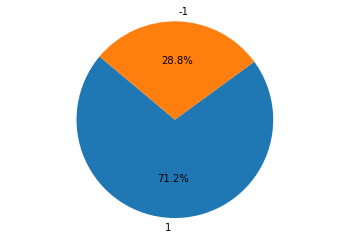

In [55]:
# Membuat pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Membuat lingkaran (pie chart) menjadi bentuk lingkaran (equal aspect ratio)

# Menampilkan pie chart
plt.show()